In [108]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Loading Data

In [109]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

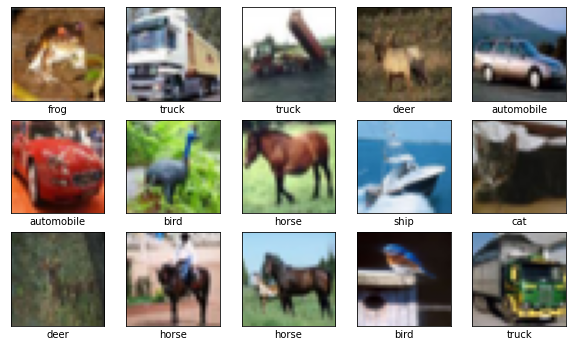

In [110]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])

# Designing Deep CNN model 

In [112]:
def model_difine():
    model=models.Sequential()
    model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(64))
    model.add(layers.Dense(10))
    return model

In [113]:
model=model_difine()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)        

In [114]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5644 - accuracy: 0.4280 - val_loss: 1.3209 - val_accuracy: 0.5230
Epoch 2/25
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2476 - accuracy: 0.5535 - val_loss: 1.1198 - val_accuracy: 0.6004
Epoch 3/25
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1288 - accuracy: 0.5998 - val_loss: 1.0007 - val_accuracy: 0.6464
Epoch 4/25
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0496 - accuracy: 0.6300 - val_loss: 0.9865 - val_accuracy: 0.6608
Epoch 5/25
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0058 - accuracy: 0.6481 - val_loss: 0.9661 - val_accuracy: 0.6615
Epoch 6/25
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9648 - accuracy: 0.6614 - val_loss: 0.8853 - val_accuracy: 0.6959
Epoch 7/25
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9294 - accuracy: 0.6750 - val_loss: 0.9018 -

# Validation Accuracies 

<AxesSubplot:>

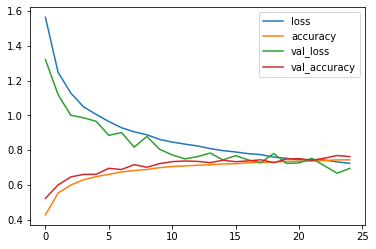

In [115]:
data_model=pd.DataFrame(model.history.history)
data_model.plot()

In [86]:
predict=model.predict(X_test)
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6864 - accuracy: 0.7630


[0.6864493489265442, 0.7630000114440918]

#  Save Prediction Model

In [ ]:
models.save_model(model,'CIFAR10')
check_img=models.load_model('CIFAR10')

# Testing on one image 

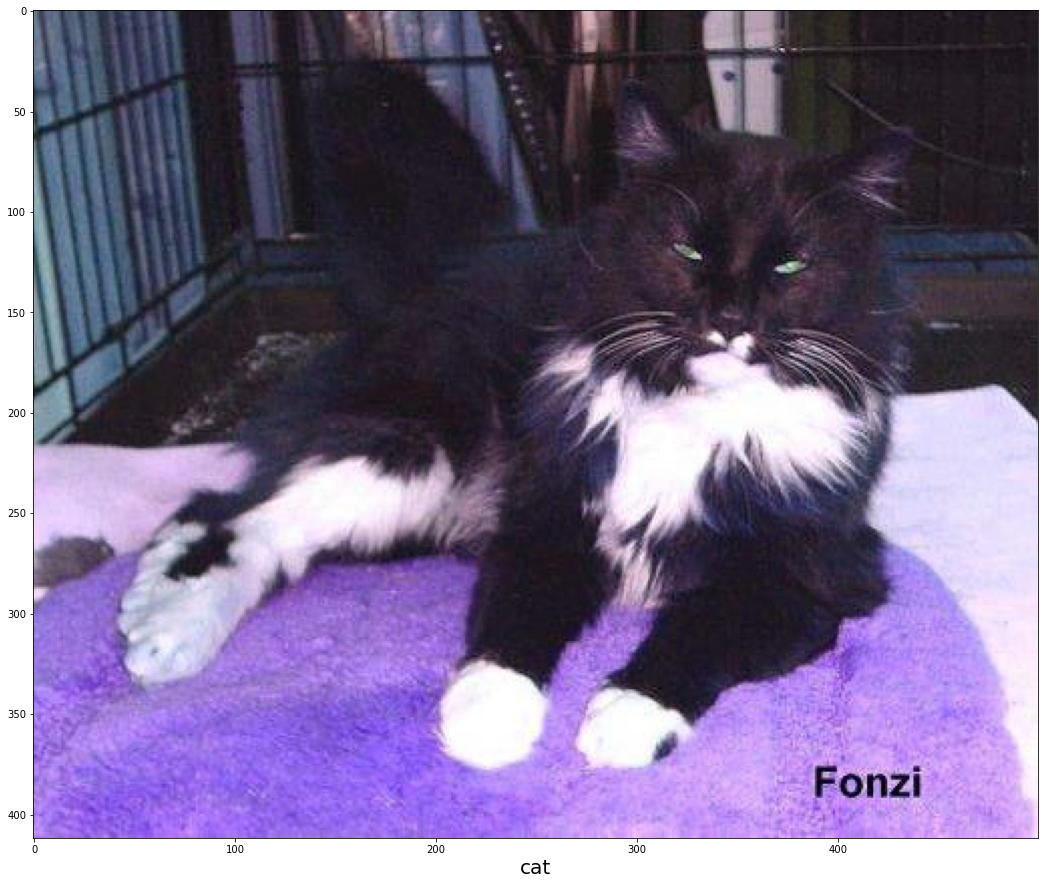

In [106]:
def checker(img):
    img=np.array(img)
    img=cv2.resize(img,(32,32))
    img=np.array(img).reshape(-1,32,32,3)
    return np.argmax(check_img.predict(img))
def print_names(img):
    for i in range(10):
        if i==checker(img):
            return class_names[i]
img=cv2.imread("../Data/dog_and_cat/Test/0/cat.4010.jpg")
plt.figure(figsize=(18,18))
plt.imshow(img)
plt.xlabel(print_names(img),fontsize=20);

# Testing on many Images 

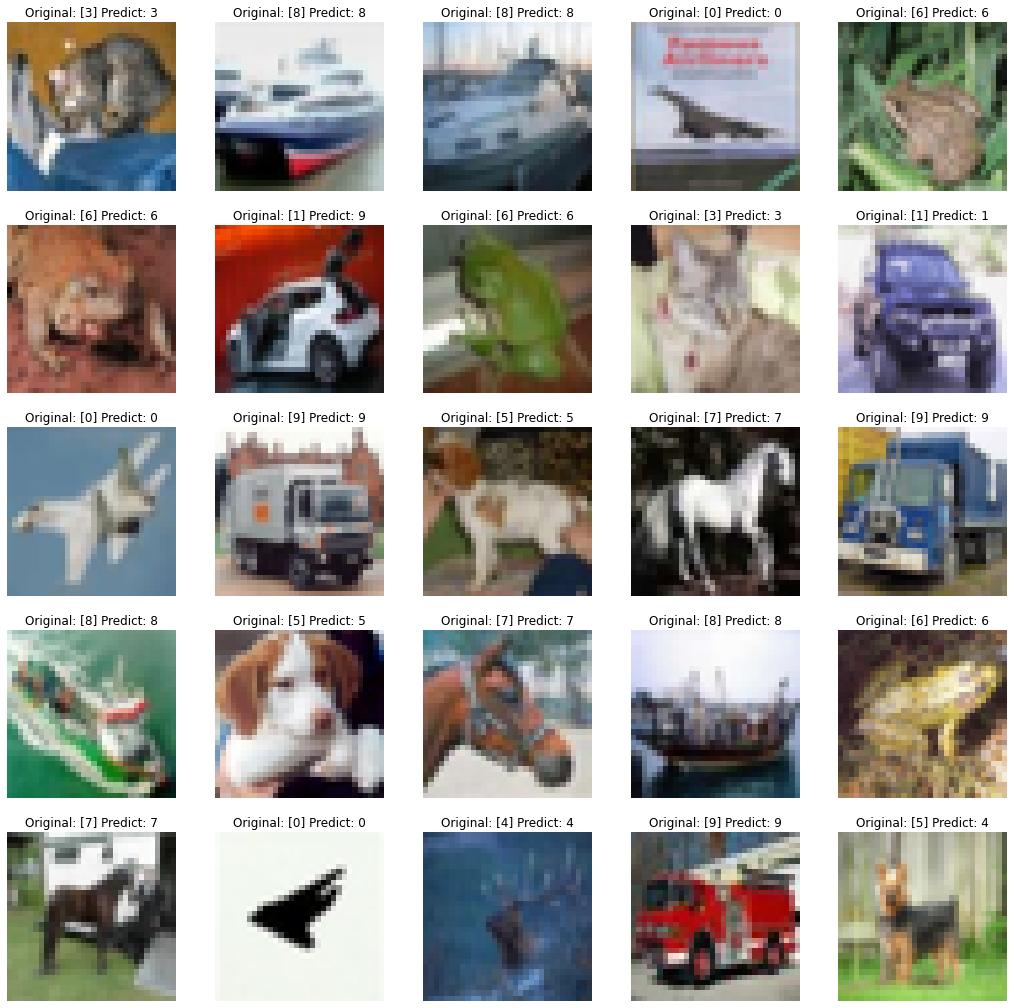

In [91]:
fig,axes=plt.subplots(5,5,figsize=(18,18))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predict: {}'.format(y_test[i],np.argmax(model.predict(X_test[i].reshape(1,32,32,3)))))